In [1]:
## GENERATES WORD LEVEL TRAINING SET ##

In [2]:
from data_utils import get_images, get_image_shapes, get_sorted_img_names, rename_imgs
from char_extraction import plot_list, get_adaptive_line_contours, get_lines, get_adaptive_words
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [3]:
# UPDATE TO YOUR PERSONAL FILE PATH
WORD_PATH = 'C:\\Users\\smmal\\OneDrive\\Documents\\school\\2022-2023\\spring\\COS429\\words' # shayna path
SOURCE_PATH = 'C:\\Users\\smmal\\OneDrive\\Documents\\school\\2022-2023\\spring\\COS429\\ground_truths'

In [4]:
# returns list of word images
def get_all_words(img):
    _, _, _, _, contours = get_adaptive_line_contours(img)
    lines = get_lines(img, contours)
    words = get_adaptive_words(lines)
    return words

In [5]:
# do the ground truth for a word list
def ground_truth(word_list, word_path, book, page_num, df=None, index=0):
    
    if not os.path.exists(word_path + '\\' + book + '\\' + str(page_num)):
        os.mkdir(word_path + '\\' + book + '\\' + str(page_num))
    
    if df is None:
        df = pd.DataFrame(columns=['word_img', 'word'])
    
    for i, word in enumerate(word_list):
        plt.figure(figsize=(2,2))
        plt.imshow(word, cmap='gray')
        plt.show()
        
        # get user input
        w = input("Type the word, or / to skip, or /END to quit")
        if w == r'/':
            continue

        if w == '/END':
            return df, word_list[i:], index + i
            
        word_name = book + '_' + str(page_num) + '_' + str(index+i) + '.jpg'
        p = word_path + '\\' + book + '\\' + str(page_num) + '\\' + word_name


        success = cv2.imwrite(p, word)
        if not success:
            print('image write failed')
            return df, word_list[i:], index+i

        df.loc[len(df.index)] = [word_name, w]
        
    return df, None, None

In [6]:
img= cv2.imread(SOURCE_PATH + r'\emma\emma_005.jpg', cv2.IMREAD_GRAYSCALE)

In [7]:
word_list = get_all_words(img)

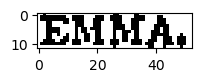

Type the word, or / to skip, or /END to quit /


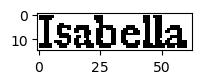

Type the word, or / to skip, or /END to quit /


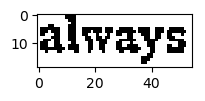

Type the word, or / to skip, or /END to quit always


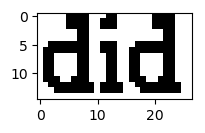

Type the word, or / to skip, or /END to quit /END


In [10]:
book_title = 'emma'
page = '005'
df, remaining_words, index = ground_truth(word_list, WORD_PATH, book_title, page)

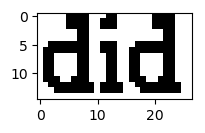

Type the word, or / to skip, or /END to quit did


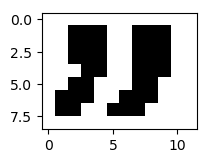

In [ ]:
# do the remaining words
df, remaining_words, index = ground_truth(remaining_words, WORD_PATH, book_title, page, df=df, index=index)

In [ ]:
print(len(df))
df.tail(20)

In [ ]:
df.to_excel(f'C:\\Users\\smmal\\OneDrive\\Documents\\school\\2022-2023\\spring\\COS429\\{book_title}_{page}.xlsx')

In [ ]:
lines, _, _, _, contours = get_line_boxes(img)
lines = get_lines(img, contours)
plot_list(lines)